In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc, gammaincinv, gamma

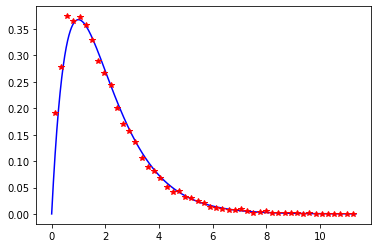

In [2]:
# a)

n_pnts = 10**4
k_sum = 2
lambda_var = 1

# Calcular xk e x_sum
u = np.random.rand(k_sum, n_pnts)
x_k = lambda_var**(-1) * np.log(lambda_var / u)
x_sum = np.sum(x_k, axis=0)

# Histograma
x_sum_max = np.max(x_sum)
n_bins = 50
dx_sum = (x_sum_max - 0) / n_bins

values, bins = np.histogram(x_sum, 
                            bins=np.linspace(dx_sum / 2, x_sum_max + dx_sum / 2, n_bins))
values = values / (np.sum(values) * dx_sum)

# Cálculo do valor teórico
dx = 0.001
x = np.arange(0, x_sum_max, dx)
p_t = lambda_var**k_sum * x**(k_sum - 1) / (gamma(k_sum)) * np.exp(- lambda_var * x)

# Plot
plt.plot(x, p_t, '-b')
plt.plot(bins[0:-1], values, '*r')

plt.show()


In [3]:
def pk_lambda(x, k, lambda_var):
    return lambda_var**k * x**(k - 1) / (gamma(k)) * np.exp(- lambda_var * x)

Fração de número rejeitados -> 0.7801


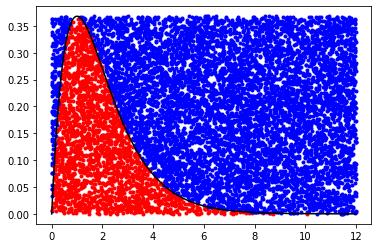

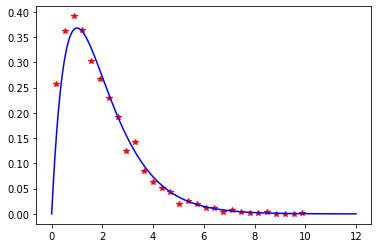

In [8]:
# b)

n_pnts = 10**4
k = 2
lambda_var = 1

# Método de aceitação/rejeição
x_max = 12
dx = 0.001
x_values = np.arange(0, x_max, dx)
w = np.max(pk_lambda(x_values, k, lambda_var))

x_accepted = list()
xp, yp = np.zeros(n_pnts), np.zeros(n_pnts)

n, n_a = 0, 0

for i in range(n_pnts):
    xp[i] = np.random.rand() * x_max
    yp[i] = np.random.rand() * w
    n += 1
    
    if yp[i] <= pk_lambda(xp[i], k, lambda_var):
        x_accepted.append(xp[i])
        n_a += 1
x_accepted = np.array(x_accepted)

print("Fração de número rejeitados -> {:.4f}".format(1 - n_a / n))

# Histograma e plots
plt.figure(1)

for i in range(n_pnts):
    if yp[i] <= pk_lambda(xp[i], k, lambda_var):
        plt.plot(xp[i], yp[i], '.r')
    else:
        plt.plot(xp[i], yp[i], '.b')
plt.plot(x_values, pk_lambda(x_values, k, lambda_var), '-k')

plt.figure(2)
x_max = np.max(x_accepted)
n_bins = 30
dx = (x_max - 0) / n_bins

values, bins = np.histogram(x_accepted, bins=np.linspace(dx/2, x_max+dx/2, n_bins))
values = values / (dx * np.sum(values))

plt.plot(bins[0:-1], values, '*r')
plt.plot(x_values, pk_lambda(x_values, k, lambda_var), '-b')

plt.show()


In [5]:
def randsample(p):
    p = p / np.sum(p)
    u = np.random.rand()
    
    s = p[0]
    i = 0
    
    while u > s:
        i += 1
        s += p[i]
    
    return i

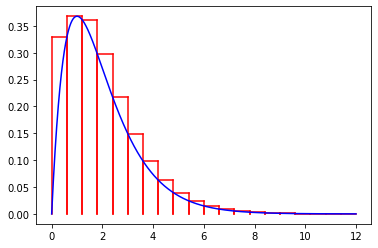

Fração de número rejeitados -> 0.1613


<Figure size 432x288 with 0 Axes>

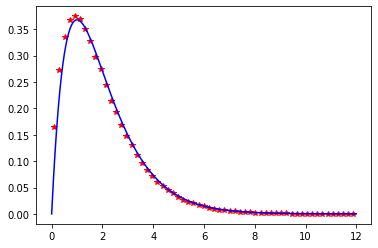

In [9]:
# c)

n_pnts = 10**6
k = 2
lambda_var = 1

# Definição dos rectangulos
x_max = 12
dx = 0.001

n_rec = 20
dx_rec = (x_max - 0) / n_rec
xi_r = np.arange(0, x_max, dx_rec)
xf_r = xi_r + dx_rec
h_r = np.zeros(n_rec)

for i in range(n_rec):
    x_values = np.arange(xi_r[i], xf_r[i], dx)
    h_r[i] = np.max(pk_lambda(x_values, k, lambda_var))

# Gráfico da função com os rectangulos
for i in range(n_rec):
    plt.plot([xi_r[i], xi_r[i]], [0, h_r[i]], '-r')
    plt.plot([xi_r[i], xf_r[i]], [h_r[i], h_r[i]], '-r')
    plt.plot([xf_r[i], xf_r[i]], [h_r[i], 0], '-r')
    
plt.plot(np.arange(0, x_max, dx), pk_lambda(np.arange(0, x_max, dx), k, lambda_var), '-b')
plt.show()

# Método de aceitação/rejeição mais eficiente
x_accepted = list()
xp, yp = np.zeros(n_pnts), np.zeros(n_pnts)

n, n_a = 0, 0
i = 0

Ai = (xf_r - xi_r) * h_r
p = Ai / np.sum(Ai)

for i in range(n_pnts):
    i_r = randsample(p)
    
    xp[i] = np.random.rand() * (xf_r[i_r] - xi_r[i_r]) + xi_r[i_r]
    yp[i] = np.random.rand() * h_r[i_r]
    n += 1
    
    if yp[i] <= pk_lambda(xp[i], k, lambda_var):
        x_accepted.append(xp[i])
        n_a += 1

x_accepted = np.array(x_accepted)

print("Fração de número rejeitados -> {:.4f}".format(1 - n_a / n))

# Histograma e plots
plt.figure(1)

#for i in range(n_pnts):
#    if yp[i] <= pk_lambda(xp[i], k, lambda_var):
#        plt.plot(xp[i], yp[i], '.r')
#    else:
#        plt.plot(xp[i], yp[i], '.b')
#plt.plot(np.arange(0, x_max, dx), pk_lambda(np.arange(0, x_max, dx), k, lambda_var), '-k')

plt.figure(2)
x_max = np.max(x_accepted)
n_bins = 60
dx = (x_max - 0) / n_bins

values, bins = np.histogram(x_accepted, bins=np.linspace(dx/2, x_max+dx/2, n_bins))
values = values / (dx * np.sum(values))

plt.plot(bins[0:-1], values, '*r')
plt.plot(np.arange(0, x_max, 0.0001), pk_lambda(np.arange(0, x_max, 0.0001), k, lambda_var), '-b')

plt.show()

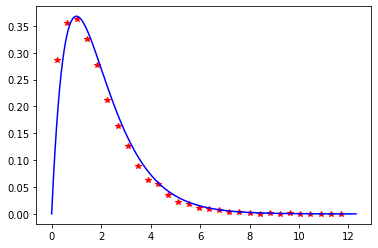

In [10]:
# d)

n_pnts = 10**4
k = 2
lambda_var = 1

u = np.random.rand(n_pnts)
x = (1 / lambda_var) * gammaincinv(k, u)

x_max = np.max(x)
n_bins = 30
dx = (x_max - 0) / n_bins

values, bins = np.histogram(x, bins=np.arange(dx/2, x_max+dx/2, dx))
values = values / (dx * np.sum(values))

plt.plot(bins[0:-1], values, '*r')
plt.plot(np.arange(0, x_max, 0.001), pk_lambda(np.arange(0, x_max, 0.001), k, lambda_var), '-b')

plt.show()
